# <center>COLOR COMPRESSION PROJECT</center>

##### <CENTER> 21127141 - BÙI ĐỖ DUY QUÂN </CENTER>

### 1. Import libraries

In [198]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.display import display, HTML

### 2. Some support functions

#### a. Reading image and showing image

In [199]:
def read_Image(filename):
    return np.array(Image.open(filename))

def show_Image(image):
    plt.imshow(image)
    plt.show()

def show_Image_side_by_side(image1, image2, k_clusters):

    fig, axes = plt.subplots(1, 2, figsize=(15, 6))


    axes[0].imshow(image1)
    axes[0].axis('off')
    axes[0].set_title('Original Image', fontsize=16)

    axes[1].imshow(image2)
    axes[1].axis('off')
    axes[1].set_title('K = ' + str(k_clusters), fontsize=16)

    plt.subplots_adjust(wspace=0.05)

    # Maximize the output display
    display(HTML("<style>.container { width:100% !important; }</style>"))

    # Show the figure
    plt.show()

#### b. Reshape image array 2D to 1D

In [200]:
def reshape_2D_to_1D(image2d):
    return np.ndarray((image2d.shape[0] * image2d.shape[1], image2d.shape[2]), 'uint8', image2d.astype('uint8'))

In [201]:
Img_array1d = reshape_2D_to_1D(Img_array2d)

##### C. Unique color matrix in image

In [202]:
def Unique_colors(image1d):
    return np.unique(image1d, axis=0).astype('int16')

#### D. Init centroids randomly and  in pixels in image

In [203]:
def Init_Random_Centroids(K_clusters, numchannels):
    return np.random.randint(0, 256, size = (K_clusters, numchannels)).astype('int16')

def Init_Random_InPixel(K_clusters, Colors):
    return np.array([Colors[color] for color in np.random.choice(Colors.shape[0], size = K_clusters, replace=False)]).astype('int16')

#### E. Convert centroids and labels to matrix 2d

In [204]:
def converting_From_Centroids_Labels_To_Image(centroids, labels, img_1d, img_2d):
    new_img_1d = np.zeros(img_1d.shape).astype('int16')
    for i in range(img_1d.shape[0]):
        new_img_1d[i] = centroids[labels[i]]
    
    return np.reshape(new_img_1d, (img_2d.shape[0], img_2d.shape[1], img_2d.shape[2]))

    

### 3. K-means algorithm

#### a. Getting labels for each pixel

In [205]:
def get_Labels(img_1d, centroids):
    return np.argmin(np.sum((((img_1d[:, None] - centroids[None, :]).astype('int64')) ** 2), axis=2), axis = 1)


#### b. Updating centroids

In [206]:
def update_Centroids(img_1d, labels, K_clusters):
    centroids = np.zeros((K_clusters, img_1d.shape[1])).astype('int64')
    counts_of_labels = np.zeros(K_clusters).astype('int64')

    for color, label in zip(img_1d, labels):
        centroids[label] += color
        counts_of_labels[label] += 1
    
    for i, count in enumerate(counts_of_labels):
        if count != 0:
            centroids[i] = (centroids[i] / count)
        else:
            centroids[i] = np.zeros(img_1d.shape[1])
            
    return centroids

#### c. Implementing K-means algorithm

In [207]:

def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):

    UniqueColors = Unique_colors(img_1d)
    

    if init_centroids == 'random':
        centroids = Init_Random_Centroids(k_clusters, img_1d.shape[1])
    elif init_centroids == 'in_pixels':
        centroids = Init_Random_InPixel(k_clusters, UniqueColors)
    else:
        print('Wrong init_centroids parameter')
        return None

    
    labels = np.zeros(img_1d.shape[0], dtype=np.uint8)
    
    for _ in range (max_iter):
    
        labels = get_Labels(img_1d, centroids)
        
        centroids = update_Centroids(img_1d, labels, k_clusters)

    return centroids, labels

        
            

#### 4. Main function

In [208]:
def main():
    file_image = input("Enter file image name: ")
    K_clusters = int(input("Enter K clusters: "))
    init_centroids = input("Enter init centroids (random or in_pixels): ")
    Output_type = input("Enter output type (pdf or png): ")

    img_2d = read_Image(file_image)
    img_1d = reshape_2D_to_1D(img_2d)

    centroids, labels = kmeans(img_1d, K_clusters, 10, init_centroids)
    new_img_2d = converting_From_Centroids_Labels_To_Image(centroids, labels, img_1d, img_2d)

    if Output_type == 'pdf':
        plt.imsave('Result.pdf', new_img_2d.astype('uint8'))
    elif Output_type == 'png':
        plt.imsave('Result.png', new_img_2d.astype('uint8'))
    else:
        print('Wrong Output_type parameter')
        return None
    
    show_Image_side_by_side(img_2d, new_img_2d, K_clusters)

### 5. Results

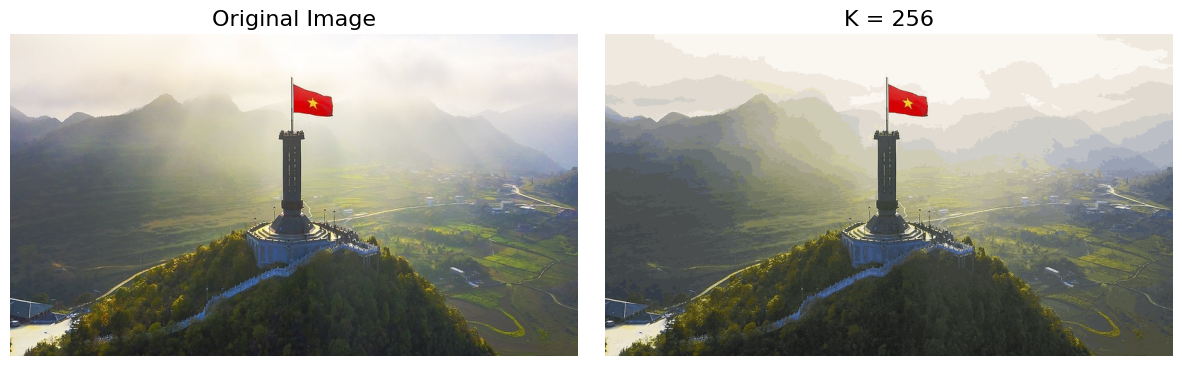

In [209]:
if __name__ == "__main__":
    main()